In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## База данных по жилью в Бостоне

### База данных по жилью в Бостоне основана на информации, собранной Службой переписи населения США о жилищном фонде в районе Бостона, Массачусетс.

#### Ниже приведены столбцы базы данных:

* **CRIM** - уровень преступности на душу населения в разбивке по городам
* **ZN** - доля земель под жилую застройку, разделенных на участки площадью более 25 000 кв.футов.
* **INDUS** - доля акров земли, не связанных с розничной торговлей, в расчете на один город.
* **CHAS** - Фиктивная переменная ЧЕС - Чарльз-Ривер (1, если участок граничит с рекой; 0 в противном случае).
* **NOX** - концентрация оксидов азота (частей на 10 миллионов)
* **RM** - среднее количество комнат в доме
* **AGE** - доля жилых помещений, построенных владельцами до 1940 года.
* **DIS** - взвешенные расстояния до пяти бостонских центров занятости
* **RAD** - индекс доступности радиальных автомагистралей
* **TAX** - полная ставка налога на имущество (на каждые $10 000 стоимости).
* **PTRATIO** - соотношение учеников и учителей по городам
* **B** - 1000(Bk - 0,63)^2, где Bk - доля чернокожих в населенном пункте
* **LSTAT** - процент более низкого статуса населения
* **MEDV** - средняя стоимость домов, занимаемых владельцами, в 1000 долларах

In [106]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv("housing.csv",header=None,delimiter=r"\s+",names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [108]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

В датасете два типа данных: int и float. Это значит, что все признаки количественные.

Дублирования и пропусков нет. Все данные приведены к правильным типам.

CHAS - бинарный признак.

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [110]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

Дубликатов среди строк нет.

Целевой признак -  средняя стоимость домов (MEDV).


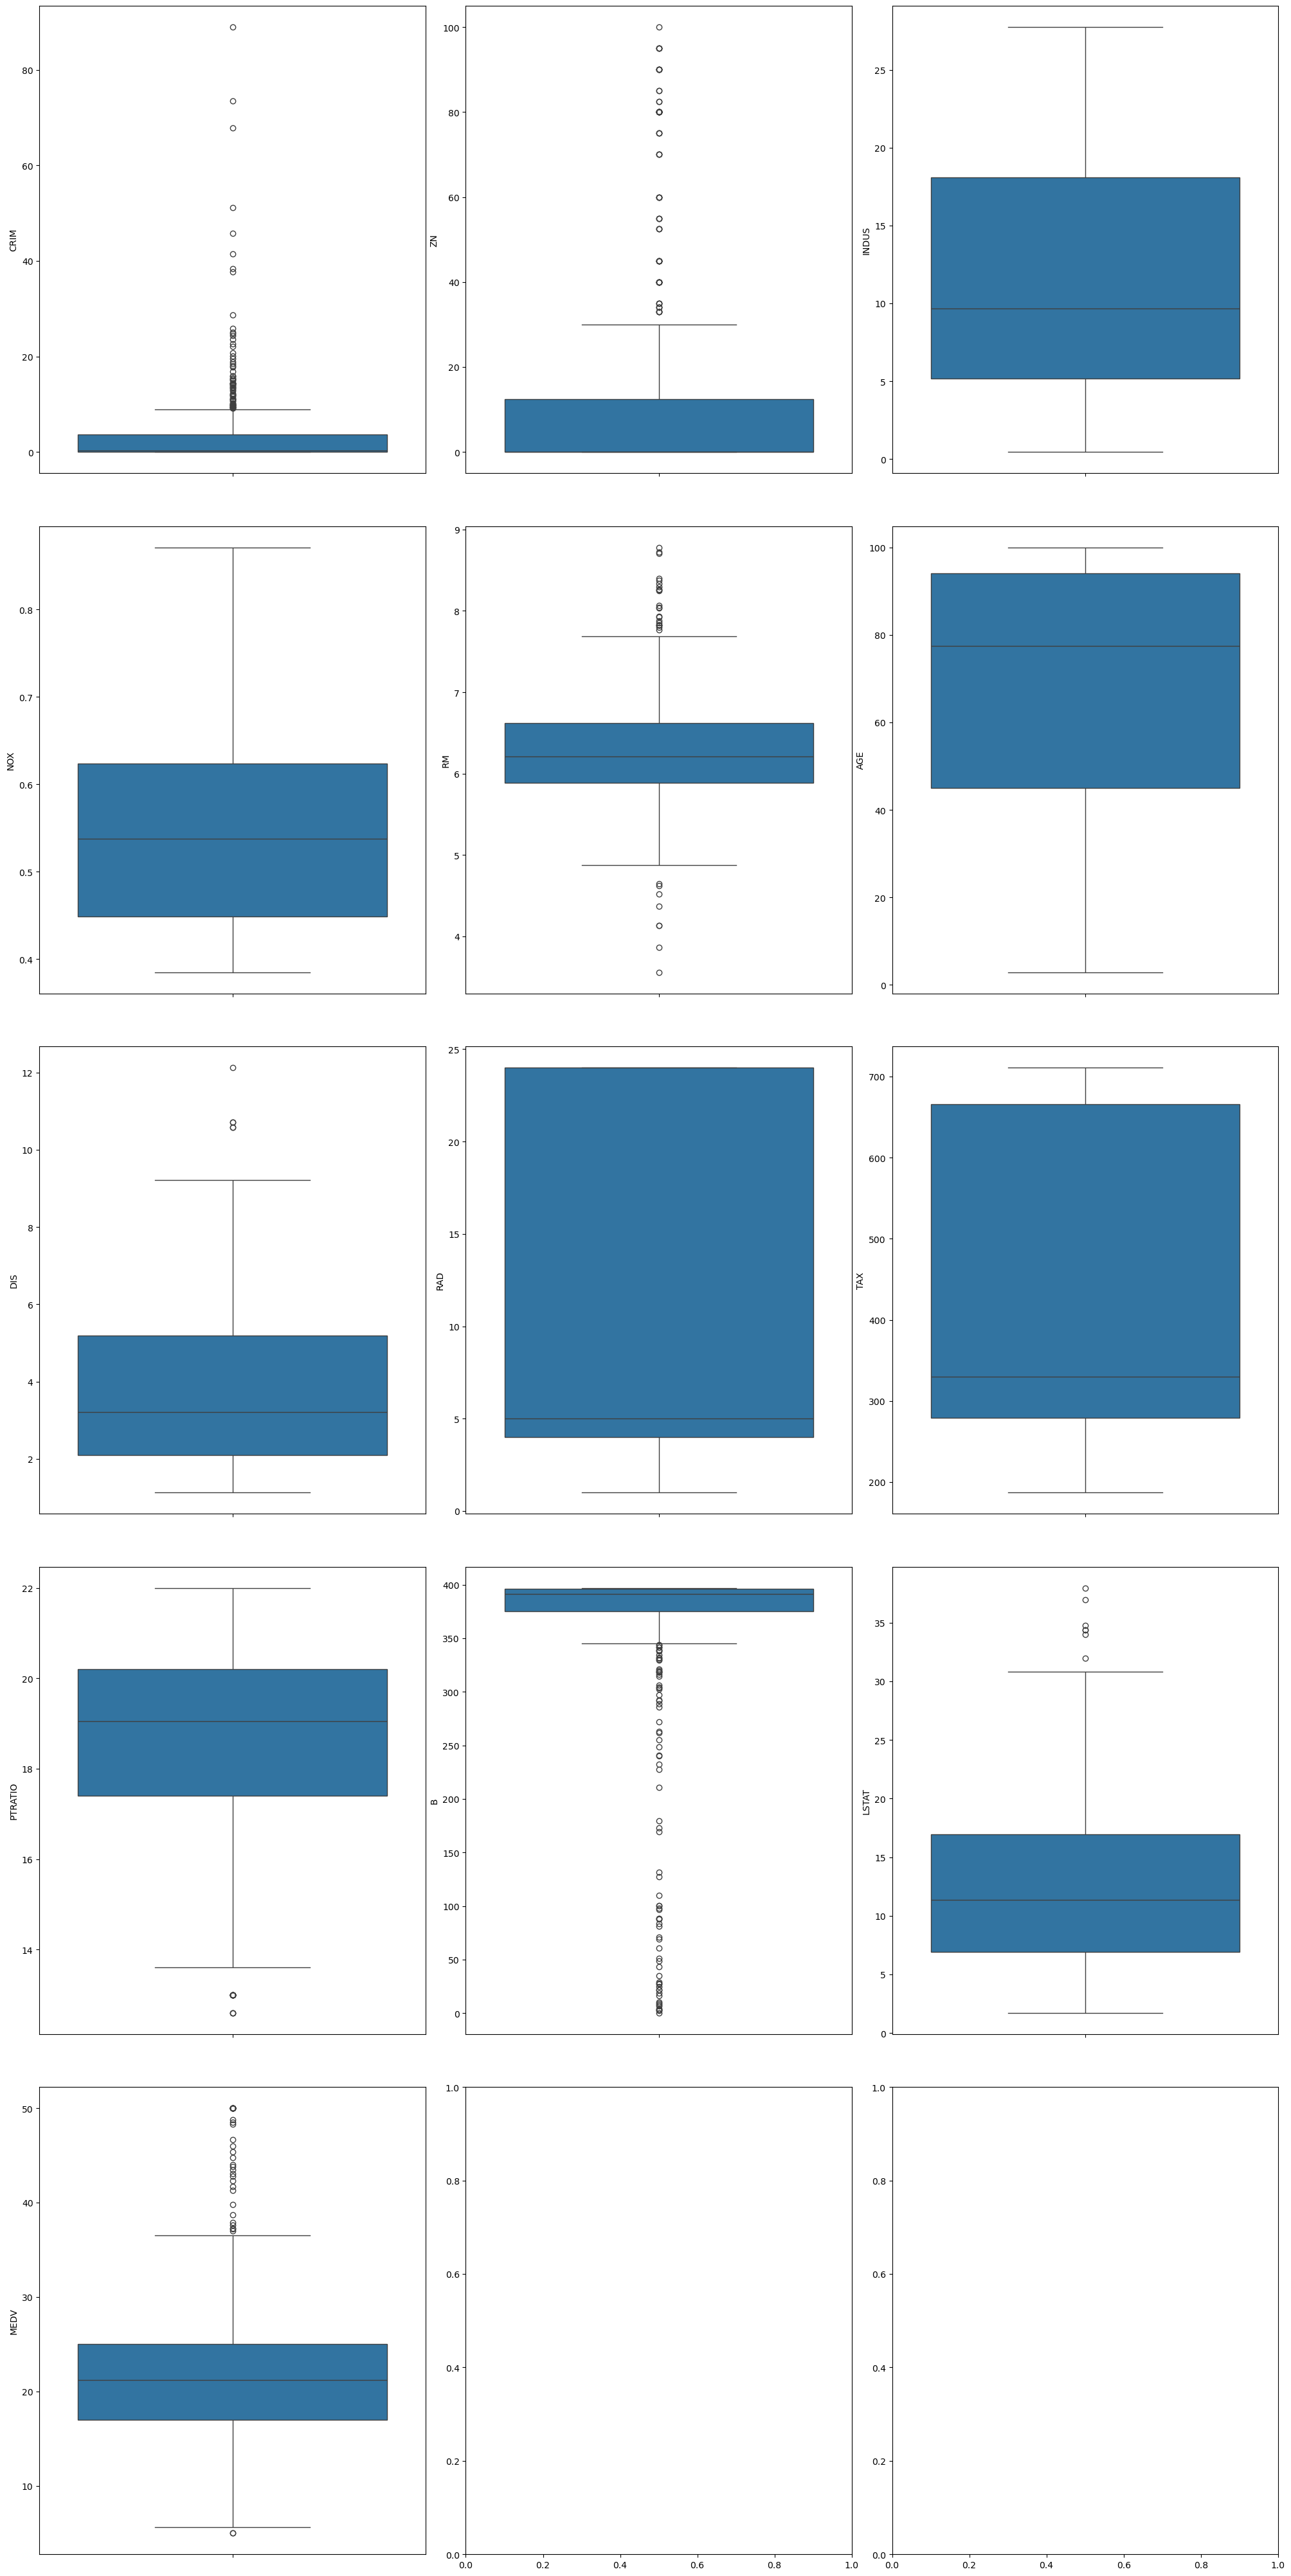

In [111]:
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20,40))
index = 0
axs = axs.flatten()

for column_name in df.drop(columns=["CHAS"]).columns:
    sns.boxplot(y=column_name, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### boxplot:

1. CRIM (уровень приступности по городам) - Основные значения от 0 до 5. Видно огромное количествао выбросов. Это значит, что в большинстве районов преступность низкая, но есть редкие районы с экстремально высокой.
2. ZN (процент жилой земли под застройку большими участками) - Основная часть данных сконцентрирована в диапазоне от 0 до 15. Много выбросов до 100. Большинство районов имеют мало таких зон, но некоторые районы полностью состоят из больших участков (100%).
3. INDUS ( доля акров земли, не связанных с розничной торговлей) - Здесь распределение более равномерное: медиана около 10, а большинство значений между 5 и 20. Выбросов почти нет.
4. NOX (концентрация оксидов азота) - Распределён равномерно, без экстремальных значений. Чем выше показатель, тем сильнее загрязнение (в некоторых районах оно заметно выше).
5. RM (среднее количество комнат в доме) - Типичный дом имеет около 6 комнат, но есть и экстремальные районы с очень маленькими или очень большими домами.
6. AGE (доля жилых помещений, построенных владельцами до 1940 года) - Признак с широким разбросом. Распределение сильно смещено в сторону старого жилья.
7. DIS (взвешенные расстояния до пяти бостонских центров занятости) - Большинство районов недалеко от центра, но редкие — сильно удалены.
8. RAD (индекс доступности радиальных автомагистралей) - Медиана очень низкая, коробка вытянута вверх, распределение сильно смещено. Большинство районов имеют низкий индекс (плохая доступность дорог), а районы с высокими значениями — редкие.
9. TAX (полная ставка налога на имущество) - данные сильно варьируются, выбросов нет. налоговые ставки заметно отличаются по районам, но экстремальных случаев мало.
10. PTRATIO (соотношение учеников и учителей по городам) - Есть немного выбросов внизу. Почти все районы имеют схожие показатели (17–20), редкие школы сильно выделяются меньшей нагрузкой.
11. B (показатель, связанный с долей чернокожего населения) - В подавляющем числе районов показатель B имеет большие значения. Вместе с тем видно много выбросов вниз, то есть встречаются отдельные районы с существенно меньшими значениями этого признака.
12. LSTAT (процент более низкого статуса населения) - Большинство районов имеют относительно низкий процент малообеспеченного населения, но встречаются отдельные районы с существенно более высоким уровнем, которые сильно выделяются.
13. MEDV (средняя стоимость домов, занимаемых владельцами) - В большинстве районов стоимость жилья держится на среднем уровне, но существуют районы с крайне высокой стоимостью, которые образуют множество верхних выбросов.

In [112]:
for column_name in df.columns:
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    
    print(f"'{column_name}': {len(outliers)} выбросов ({len(outliers)/len(df)*100:.2f}%)")

'CRIM': 66 выбросов (13.04%)
'ZN': 68 выбросов (13.44%)
'INDUS': 0 выбросов (0.00%)
'CHAS': 35 выбросов (6.92%)
'NOX': 0 выбросов (0.00%)
'RM': 30 выбросов (5.93%)
'AGE': 0 выбросов (0.00%)
'DIS': 5 выбросов (0.99%)
'RAD': 0 выбросов (0.00%)
'TAX': 0 выбросов (0.00%)
'PTRATIO': 15 выбросов (2.96%)
'B': 77 выбросов (15.22%)
'LSTAT': 7 выбросов (1.38%)
'MEDV': 40 выбросов (7.91%)


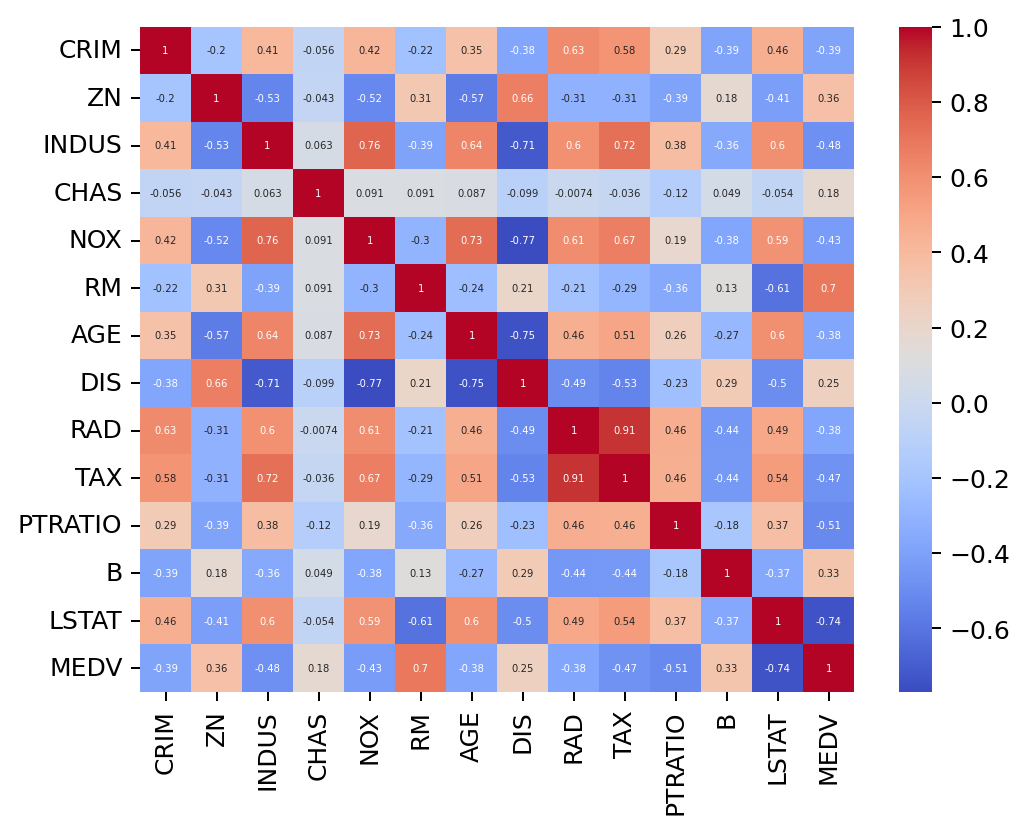

In [113]:
plt.figure(dpi=180)
sns.heatmap(df.corr(),annot=True,annot_kws={'size':4},cmap='coolwarm')
plt.show()

1. Чем больше **NOX**, тем больше **INDUS** (высокая прямая корреляция)(0.76)(чем больше концентрация оксидов азота, тем больше доля акров, занятых не розничным бизнесом. Это указывает на то, что промышленные зоны связаны с более высоким уровнем загрязнения.).
2. Чем больше **AGE**, тем больше **NOX** (высокая прямая корреляция)(0.73)(чем больше доля жилых помещений, построенных владельцами до 1940 года, тем больше концентрация оксидов азота. Вероятно, такие районы расположены ближе к промышленным зонам.).
3. Чем больше **DIS**, тем меньше **INDUS** (высокая обратная корреляция)(-0.71)(чем больше расстояния до 5 бостонских центров занятости, тем меньше доля акров, занятых не розничным бизнесом).
4. Чем больше **DIS**, тем меньше **NOX** (высокая обратная корреляция)(-0.77)(чем больше расстояния до 5 бостонских центров занятости, тем меньше концентрация оксидов азота).
5. Чем больше **DIS**, тем меньше **AGE** (высокая обратная корреляция)(-0.75)(чем больше расстояния до 5 бостонских центров занятости, тем меньше доля жилых помещений, построенных владельцами до 1940 года).
Это говорит о том, что пригородные районы экологически более чистые и современно застроенные.
6. Чем больше **INDUS** тем больше **TAX** (высокая прямая корреляция)(0.72)(чем больше доля акров, занятых не розничным бизнесом, тем выше налог).
7. Чем больше **RAD**, тем больше **TAX** (высокая прямая корреляция)(0.91)(чем выше индекс доступности радиальных автомагистралей, тем выше налог).
8. Чем больше **RM**, тем больше **MEDV** (высокая прямая корреляция)(0.7)(чем больше среднее количество комнат в домеб тем больше средняя стоимость дома).
9. Чем меньше **LSTAT**, тем больше **MEDV** (высокая обратная корреляция)(-0.74)(чем меньше процент низкого статуса населения, тем больше средняя стоимость).
10. Чем выше отношение учеников к учителям (PTRATIO) — тем дешевле жильё.

   
Корреляции показывают, что на стоимость жилья (MEDV) сильнее всего влияют:
положительно → количество комнат (RM),
отрицательно → доля низкостатусного населения (LSTAT).

А на экологию и налоги влияют промышленные зоны и транспортная доступность:
промышленные районы связаны с загрязнением (NOX), старым жильём (AGE) и высокими налогами (TAX),
отдалённые районы (большой DIS) более экологичные и менее индустриализированные.

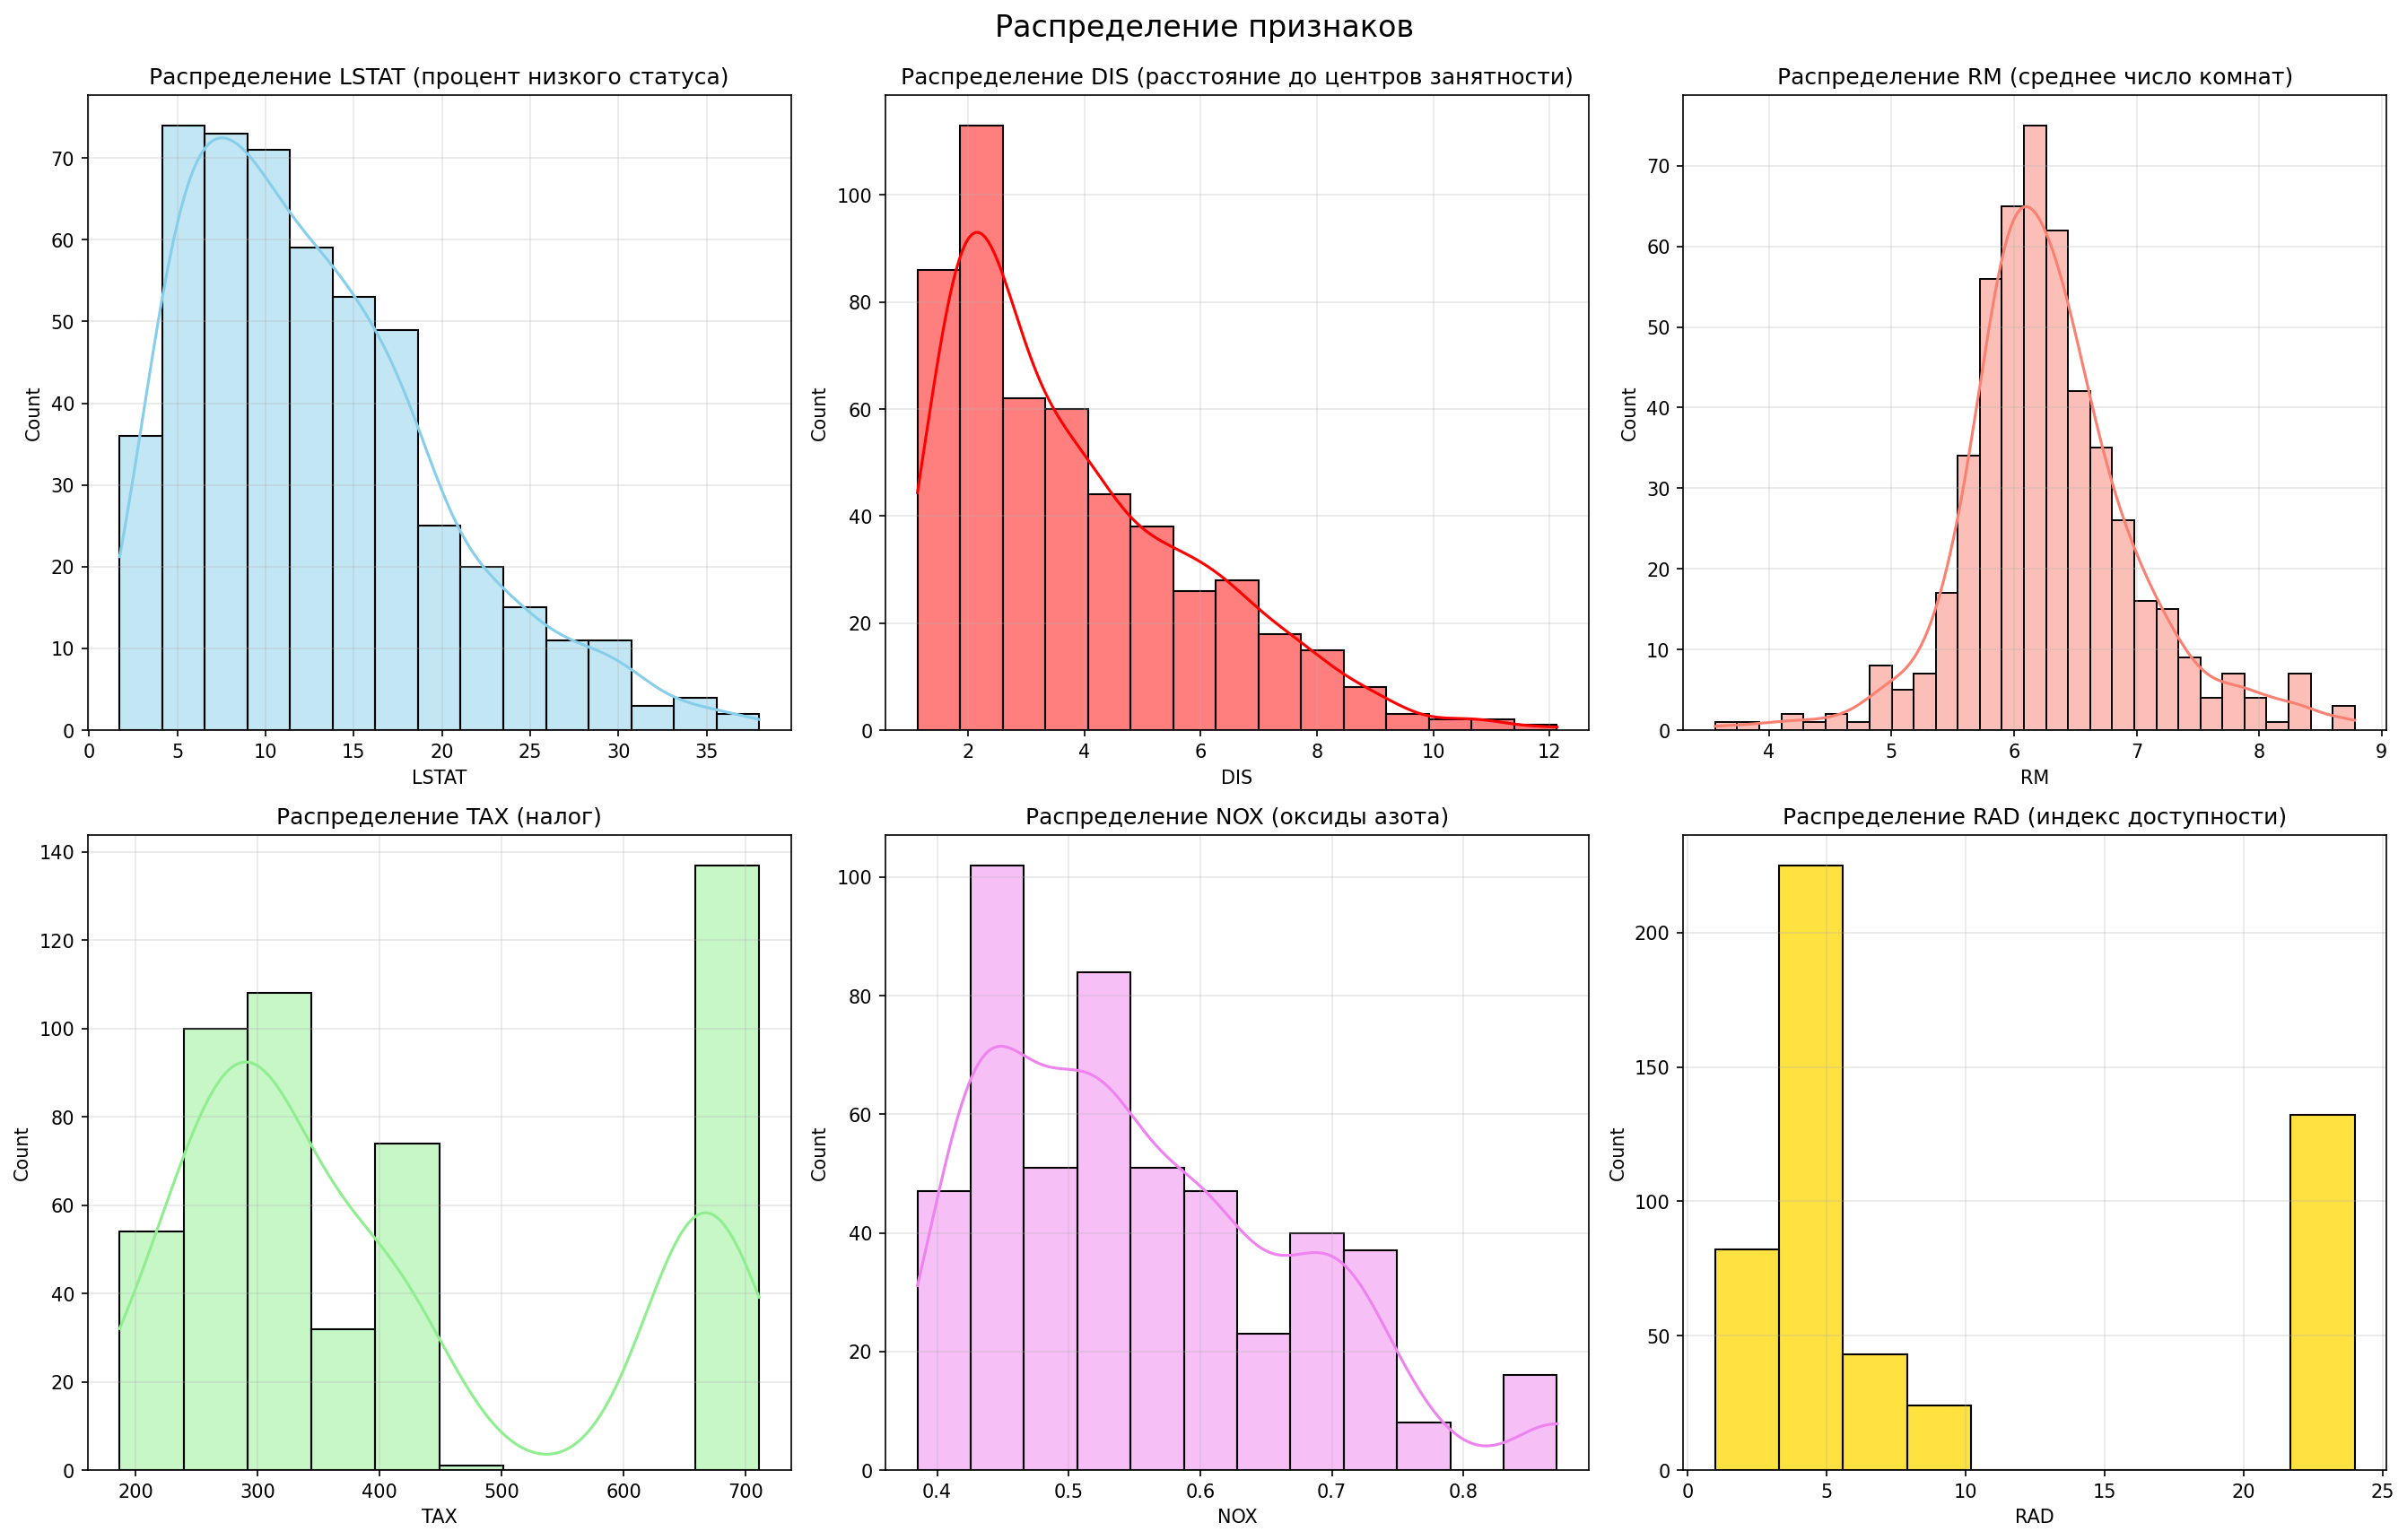

In [114]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12), dpi=150)
fig.suptitle('Распределение признаков', fontsize=16, y=0.95)

sns.histplot(df['LSTAT'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Распределение LSTAT (процент низкого статуса)')
axes[0, 0].grid(True, alpha=0.3)

sns.histplot(df['DIS'], kde=True, ax=axes[0, 1], color='red')
axes[0, 1].set_title('Распределение DIS (расстояние до центров занятности)')
axes[0, 1].grid(True, alpha=0.3)

sns.histplot(df['RM'], kde=True, ax=axes[0, 2], color='salmon')
axes[0, 2].set_title('Распределение RM (среднее число комнат)')
axes[0, 2].grid(True, alpha=0.3)

sns.histplot(df['TAX'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Распределение TAX (налог)')
axes[1, 0].grid(True, alpha=0.3)

sns.histplot(df['NOX'], kde=True, ax=axes[1, 1], color='violet')
axes[1, 1].set_title('Распределение NOX (оксиды азота)')
axes[1, 1].grid(True, alpha=0.3)

sns.histplot(df['RAD'], kde=False, ax=axes[1, 2], color='gold')
axes[1, 2].set_title('Распределение RAD (индекс доступности)')
axes[1, 2].grid(True, alpha=0.3)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

1. Наибольшая часть районов имеет 5–15% малообеспеченного населения.
2. Жильё сконцентрировано ближе к центрам занятости.
3. Преобладают дома среднего размера (5-7 комнат).
4. Основные налоги находятся в диапозонах: 250-350, 400-450, 650-710
5. Основные значения: 0.45–0.55 и 0.6–0.7. Небольшое количество районов с очень высоким загрязнением (0.8+).
6. Большинство районов имеет низкий уровень доступности радиальных магистралей.

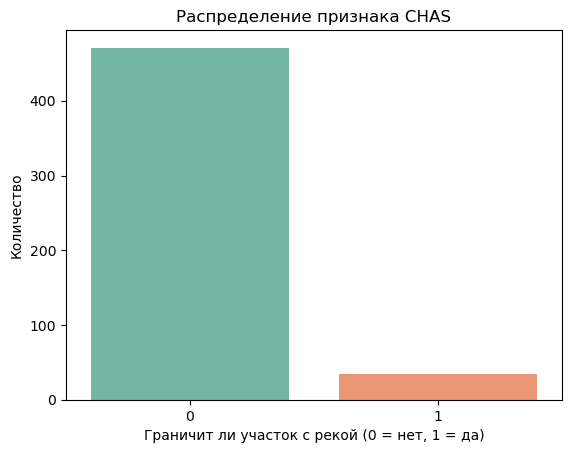

In [115]:
sns.countplot(
    x="CHAS",
    data=df,
    hue="CHAS",
    palette="Set2",
    legend=False 
)

plt.title("Распределение признака CHAS")
plt.xlabel("Граничит ли участок с рекой (0 = нет, 1 = да)")
plt.ylabel("Количество")
plt.show()

В большинстве случаев участки не граничят с рекой.

### Распределения целевой переменной MEDV

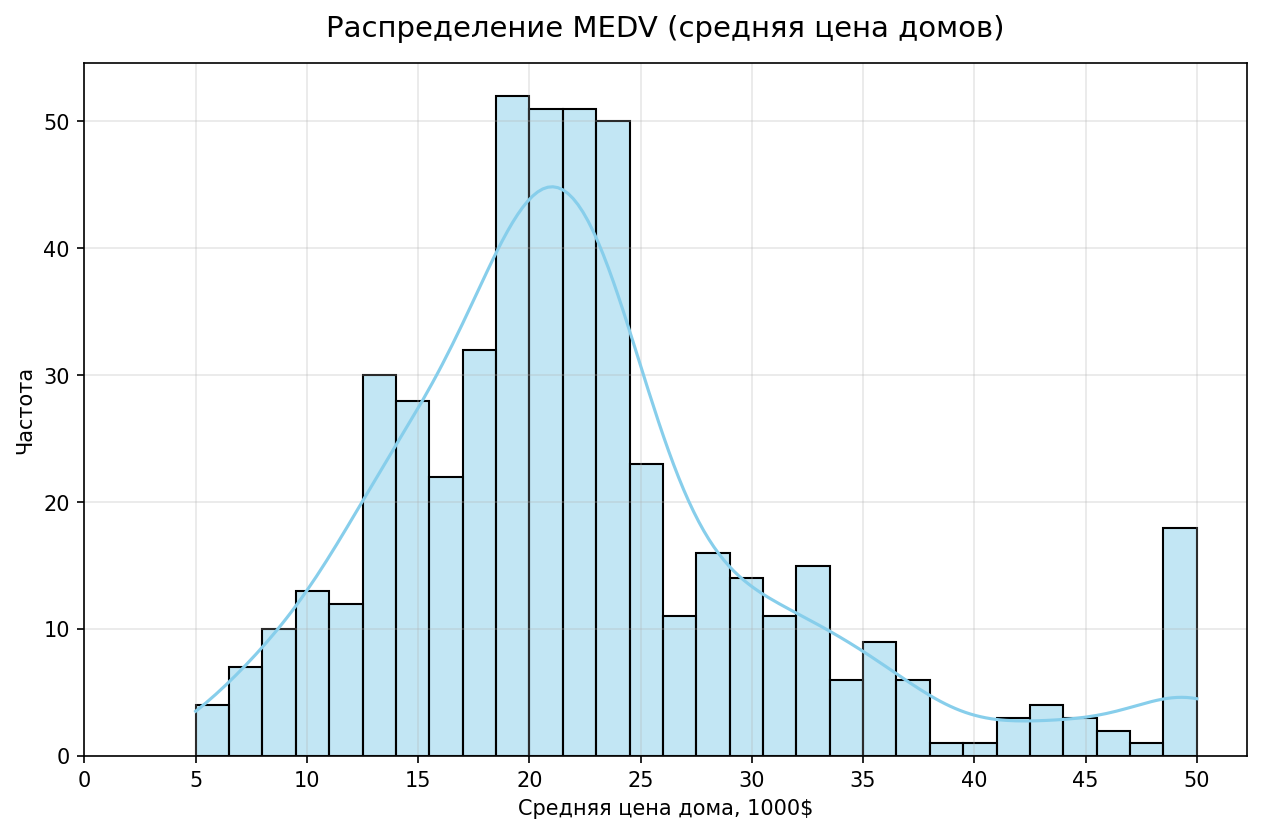

In [116]:
plt.figure(figsize=(10, 6), dpi=150)

plt.title('Распределение MEDV (средняя цена домов)', fontsize=14, y=1.02)

sns.histplot(df['MEDV'], kde=True, bins=30, color="skyblue")

plt.xlabel('Средняя цена дома, 1000$')
plt.ylabel('Частота')
plt.xticks(range(0, 51, 5))
plt.grid(True, alpha=0.3)

plt.show()

Наиболее частая средняя цена домов в выборке: 15–25 тыс. $. Есть “хвост” с более дорогими домами.

Приведём графики зависимостей MEDV от LSTAT и RM.

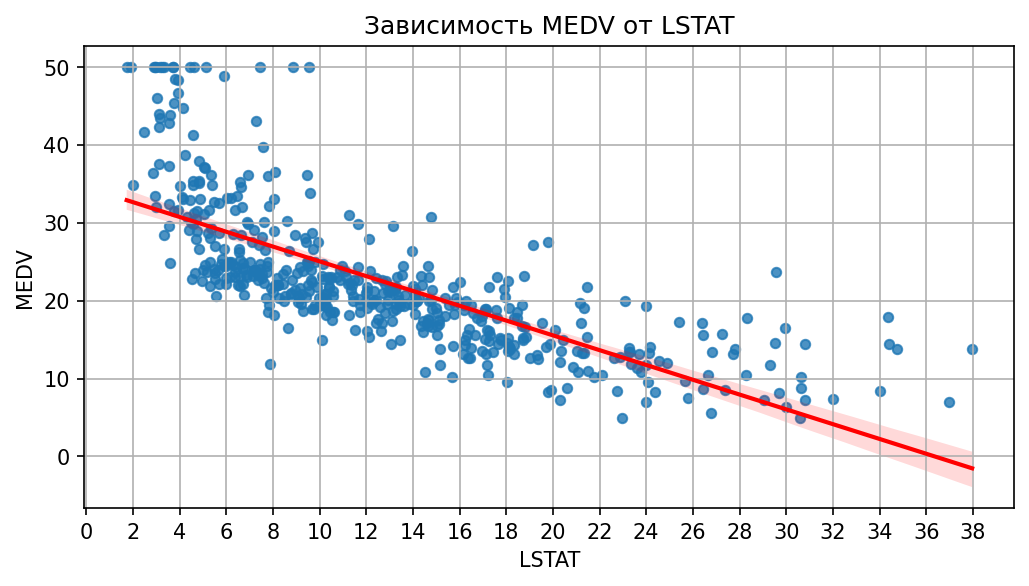

In [117]:
plt.figure(figsize=(8, 4), dpi=150) 
sns.regplot(data=df, x='LSTAT', y='MEDV',scatter_kws={'s':20},line_kws={'color':'red', 'lw':2}) 
plt.grid(True) 
plt.xticks(range(0, 40,2))  
plt.title("Зависимость MEDV от LSTAT") 
plt.show()

Между LSTAT и MEDV существует сильная обратная зависимость: районы с большим процентом малообеспеченного населения характеризуются более низкой стоимостью жилья.

plt.figure(figsize=(8, 4), dpi=150) 
sns.regplot(data=df, x='RM', y='MEDV',scatter_kws={'s':20},line_kws={'color':'red', 'lw':2}) 
plt.grid(True) 
plt.xticks(range(3, 10,1))  
plt.title("Зависимость MEDV от RM") 
plt.show()

Между количеством комнат и ценой жилья существует сильная прямая зависимость: больше комнат → выше цена. Большинство домов имеют от 5 до 7 комнат

### Заключение:

Всего в выборке 506 строк и 14 столбцов. Прпусков и дубликатов нет.

#### Целевая переменная - MEDV (средняя стоимость)
Наиболее частая средняя цена домов в выборке: 15–25 тыс. $. Медианная цена - около 21 тыс.
Есть выбросы. На сайте, где были взяты данные, указано, что они специально были ограничены 50 тыс.

Корреляции показывают, что на стоимость жилья (MEDV) сильнее всего влияют:
положительно → количество комнат (RM),
отрицательно → доля низкостатусного населения (LSTAT) и соотношение учеников к учителям (PTRATIO).

Остальные признаки также влияют, но слабее.

### Алгоритм линейной регрессии

In [118]:
import random
import numpy as np
import pandas as pd

X_raw = df.drop(columns=["MEDV"])
y = df["MEDV"].values

# Нормализация (среднее=0, std=1)
X_mean = X_raw.mean()
X_std = X_raw.std()
X = (X_raw - X_mean) / X_std

def predict_row(x: List[float], w: List[float], b: float) -> float:
    """
    Возвращает предсказание для одного объекта.

    Args:
        x (List[float]): Вектор признаков.
        w (List[float]): Веса модели .
        b (float): Сдвиг (intercept).

    Returns:
        float: Предсказанное значение y_hat.
    """
    s = 0.0
    for j in range(len(w)):
        s += w[j] * x[j]
    return s + b


def predict(X_vals: List[List[float]], w: List[float], b: float) -> List[float]:
    """
    Предсказывает для набора объектов.

    Args:
        X_vals (List[List[float]]): Матрица признаков n×m.
        w (List[float]): Веса длины m.
        b (float): Сдвиг.

    Returns:
        List[float]: Список предсказаний длины n.
    """
    return [predict_row(row, w, b) for row in X_vals]


def mse(y_true: List[float], y_pred: List[float]) -> float:
    """Считает среднеквадратичную ошибку (MSE)."""
    n = len(y_true)
    s = 0.0
    for i in range(n):
        d = y_pred[i] - y_true[i]
        s += d * d
    return s / n


def fit_linear_gd(
    X_vals: List[List[float]],
    y_vals: List[float],
    lr: float = 0.01,
    n_iters: int = 30000,
    tol: float = 1e-9,
):
    """
    Обучает линейную регрессию градиентным спуском (без сторонних библиотек).

    Args:
        X_vals (List[List[float]]): Матрица признаков n×m (стандартизованная).
        y_vals (List[float]): Целевые значения длины n.
        lr (float): Скорость обучения (шаг градиентного спуска).
        n_iters (int): Максимальное число итераций.
        tol (float): Порог улучшения MSE для ранней остановки.

    Returns:
        Tuple[List[float], float]: Пара (w, b) — веса и сдвиг.
    """
    n = len(X_vals)
    m = len(X_vals[0])
    w = [0.0] * m
    b = 0.0
    prev_loss = float("inf")

    for _ in range(n_iters):
        # 1) прямой проход
        y_hat = predict(X_vals, w, b)
        loss = mse(y_vals, y_hat)

        # ранняя остановка
        if prev_loss - loss >= 0 and (prev_loss - loss) < tol:
            break
        prev_loss = loss

        # 2) градиенты по каждому w_j и по b
        dw = [0.0] * m
        db = 0.0
        for i in range(n):
            e = y_hat[i] - y_vals[i]
            db += e
            xi = X_vals[i]
            for j in range(m):
                dw[j] += e * xi[j]
        db = (2.0 / n) * db
        for j in range(m):
            dw[j] = (2.0 / n) * dw[j]

        # 3) шаг GD
        for j in range(m):
            w[j] -= lr * dw[j]
        b -= lr * db

    return w, b

X_list = X.values.tolist()
y_list = y.tolist()

w, b = fit_linear_gd(X_list, y_list, lr=0.01, n_iters=40000, tol=1e-9)

# 3) Считаем MSE и печатаем коэффициенты (на стандартизированных признаках)
y_pred = predict(X_list, w, b)
mse_val = mse(y_list, y_pred)
print(f"MSE: {mse_val:.4f}")

print("\nКоэффициенты (стандартизированные признаки):")
for name, ww in zip(df.columns[:-1], w):
    print(f"{name:>8}: {ww:+.4f}")
print("Сдвиг (b):", round(b, 4))

MSE: 21.8948

Коэффициенты (стандартизированные признаки):
    CRIM: -0.9290
      ZN: +1.0824
   INDUS: +0.1404
    CHAS: +0.6825
     NOX: -2.0586
      RM: +2.6770
     AGE: +0.0194
     DIS: -3.1072
     RAD: +2.6633
     TAX: -2.0770
 PTRATIO: -2.0626
       B: +0.8501
   LSTAT: -3.7473
Сдвиг (b): 22.5328


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# обучаем sklearn на тех же X, y
sk = LinearRegression()
sk.fit(X, y)

y_pred_sk = sk.predict(X)
mse_sk = mean_squared_error(y, y_pred_sk)

print("MSE (sklearn):", round(mse_sk, 4))

print("\nКоэффициенты:")
for name, coef in zip(df.columns[:-1], sk.coef_):
    print(f"{name:>8}: {coef:+.6f}")

print("Сдвиг (intercept):", round(sk.intercept_, 6))


MSE (sklearn): 21.8948

Коэффициенты:
    CRIM: -0.929065
      ZN: +1.082639
   INDUS: +0.141039
    CHAS: +0.682414
     NOX: -2.058754
      RM: +2.676877
     AGE: +0.019485
     DIS: -3.107116
     RAD: +2.664852
     TAX: -2.078837
 PTRATIO: -2.062646
       B: +0.850109
   LSTAT: -3.747332
Сдвиг (intercept): 22.532806
